

```
# 코드로 형식 지정됨
```

# 인공신경망


## 1.다층 신경망을 통한 XOR 구현

논리 연산 XOR에 대한 binary classifier를 3층 신경망을 통해 구현하려고 한다.

아래 지문에 따라 classifier를 구현하시오.

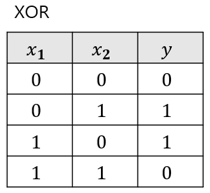

In [ ]:
import numpy as np
import matplotlib.pylab as plt

np.random.seed(2023)

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

#### (a) (Handwriting) 3개의 층을 가지는 인공신경망에서 **각 층의 노드 개수**가 아래와 같을 때, 각 층의 **W**와 **b**의 차원을 쓰시오.
- 1번 은닉층 : 노드 2개
- 2번 은닉층 : 노드 3개
- 3번 출력층 : 노드 1개



(그림을 첨부해 주세요.)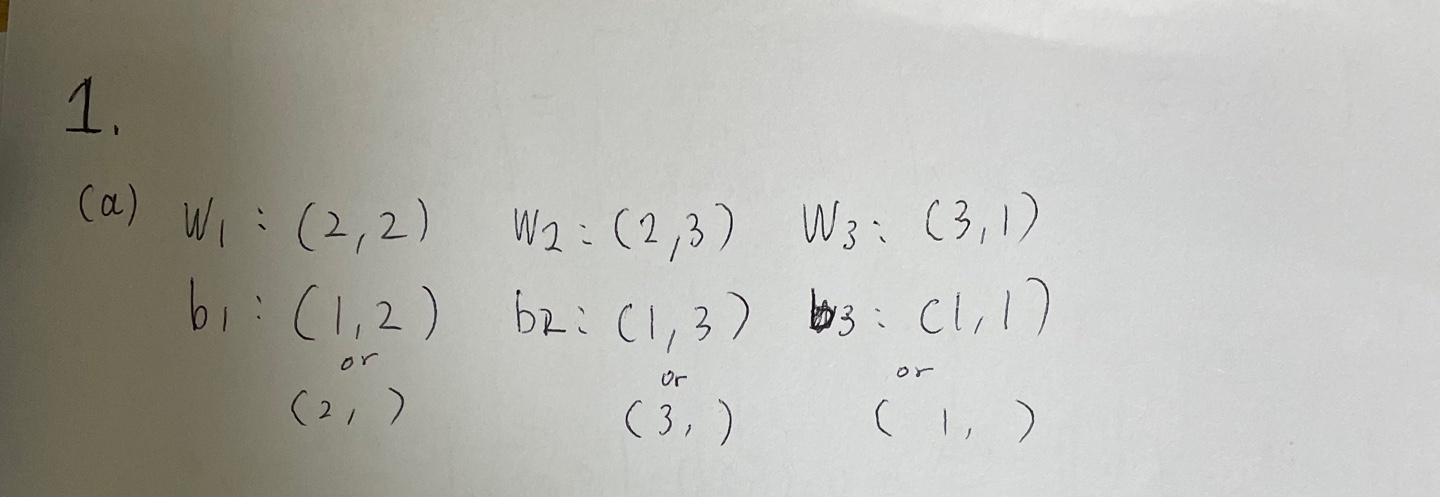

#### (b) (Handwriting) 각 층에 있는 **파라미터(W, b)의 초기값을 1**로 설정하였을 때,

#### 인공 신경망에 대한 **순전파(forward) 과정**과 이 때의 **손실함수 값**을 손으로 풀고, **쓰신 과정을 그림으로 첨부하시오.**

 - 활성화 함수 : sigmoid / 손실 함수 : Mean Squared Error

 - 활성화 함수와 손실함수는 컴퓨터로 계산하며, 소수점 아래 2자리 까지만 쓴다.

 - 수치적인 계산에는 컴퓨터를 사용하되, 연산 결과는 순차적으로 자세히 서술한다.
 - 손으로 풀어 쓴(종이/전자 필기) 과정을 그림으로 첨부해 주세요.

(그림을 첨부해 주세요.)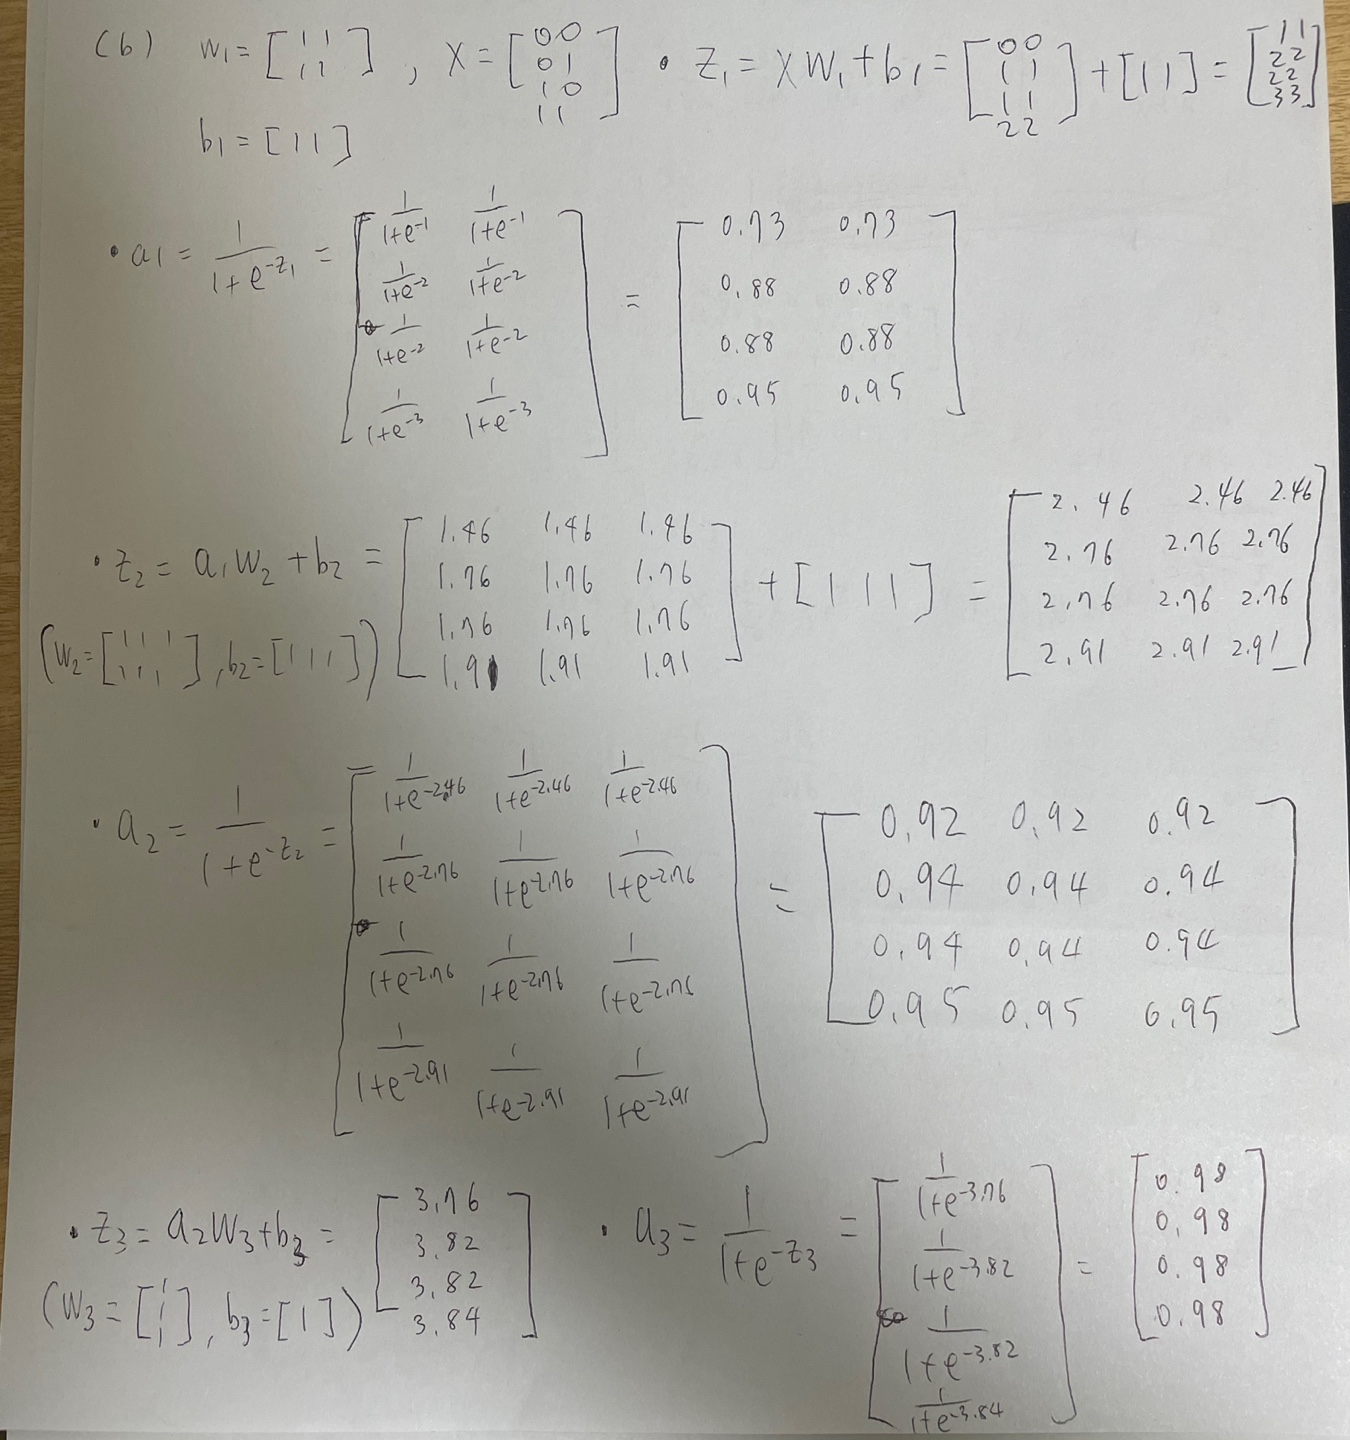

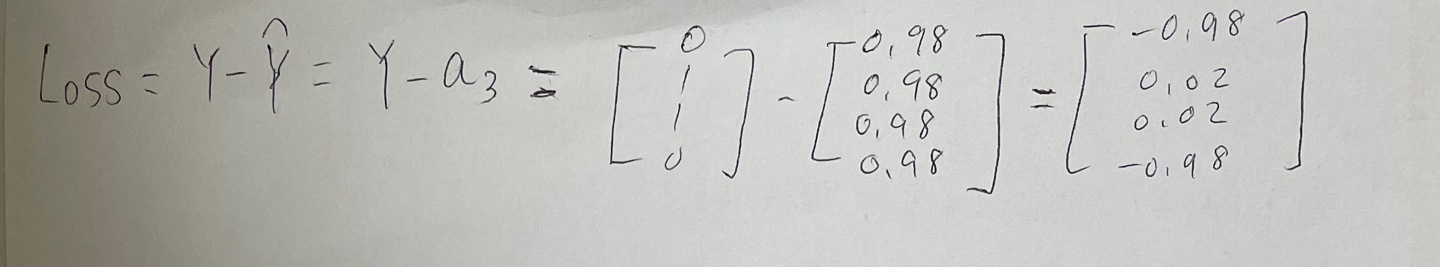

#### (c) (Handwriting) 위에서 구한 손실함수 값으로부터 **역전파(backward) 과정**을 진행하려 한다.

#### 역전파를 통해 **1회 업데이트된 각 층의 W, b**의 계산 과정을 손으로 풀고, 쓰신 **과정을 그림으로 첨부하시오.**
- step size : 10
- 활성화 함수 : sigmoid / 손실 함수 : Mean Squared Error

- 활성화 함수와 손실함수는 컴퓨터로 계산하며, 소수점 아래 2자리 까지만 쓴다.

- 수치적인 계산에는 컴퓨터를 사용하되, 연산 결과는 순차적으로 자세히 서술한다.

- 손으로 풀어 쓴(종이/전자 필기) 과정을 그림으로 첨부해 주세요.


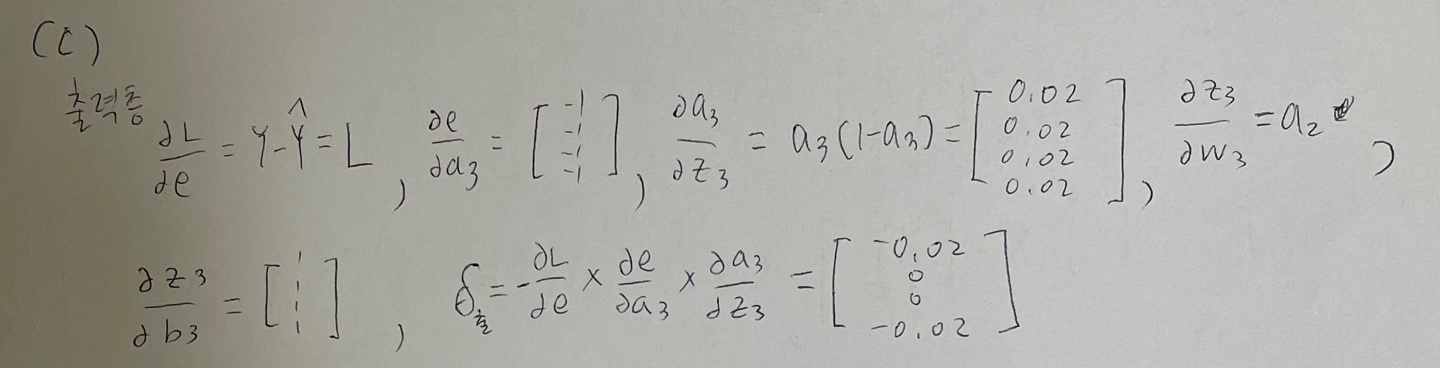(그림을 첨부해 주세요.)

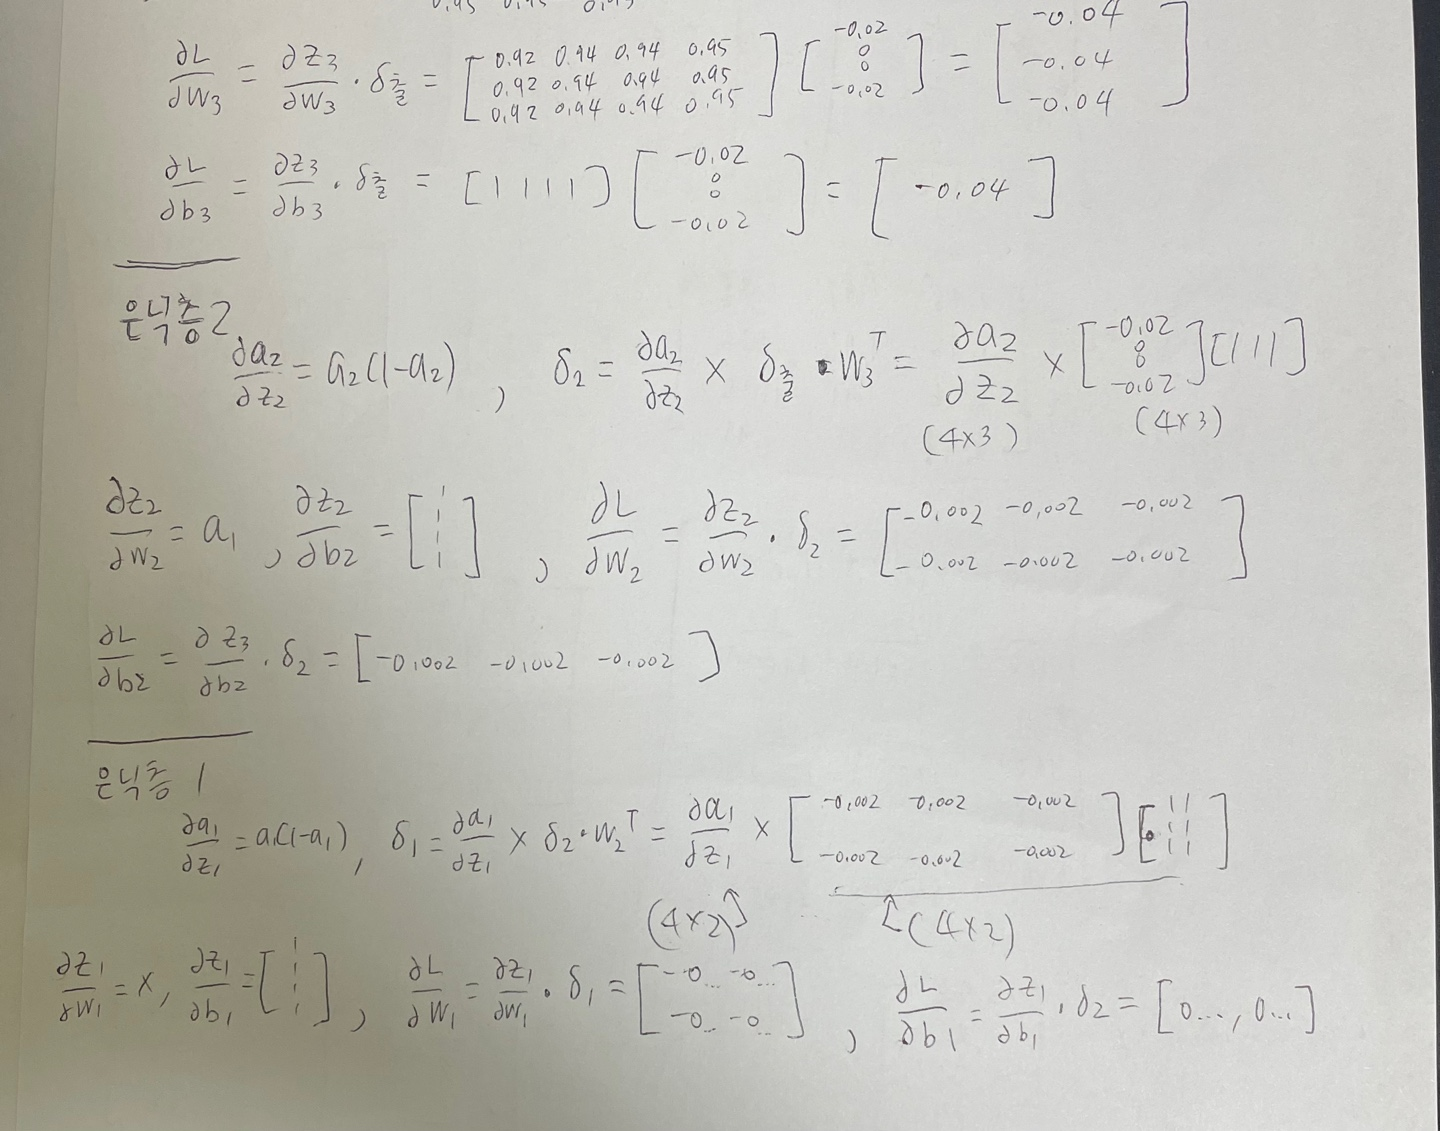

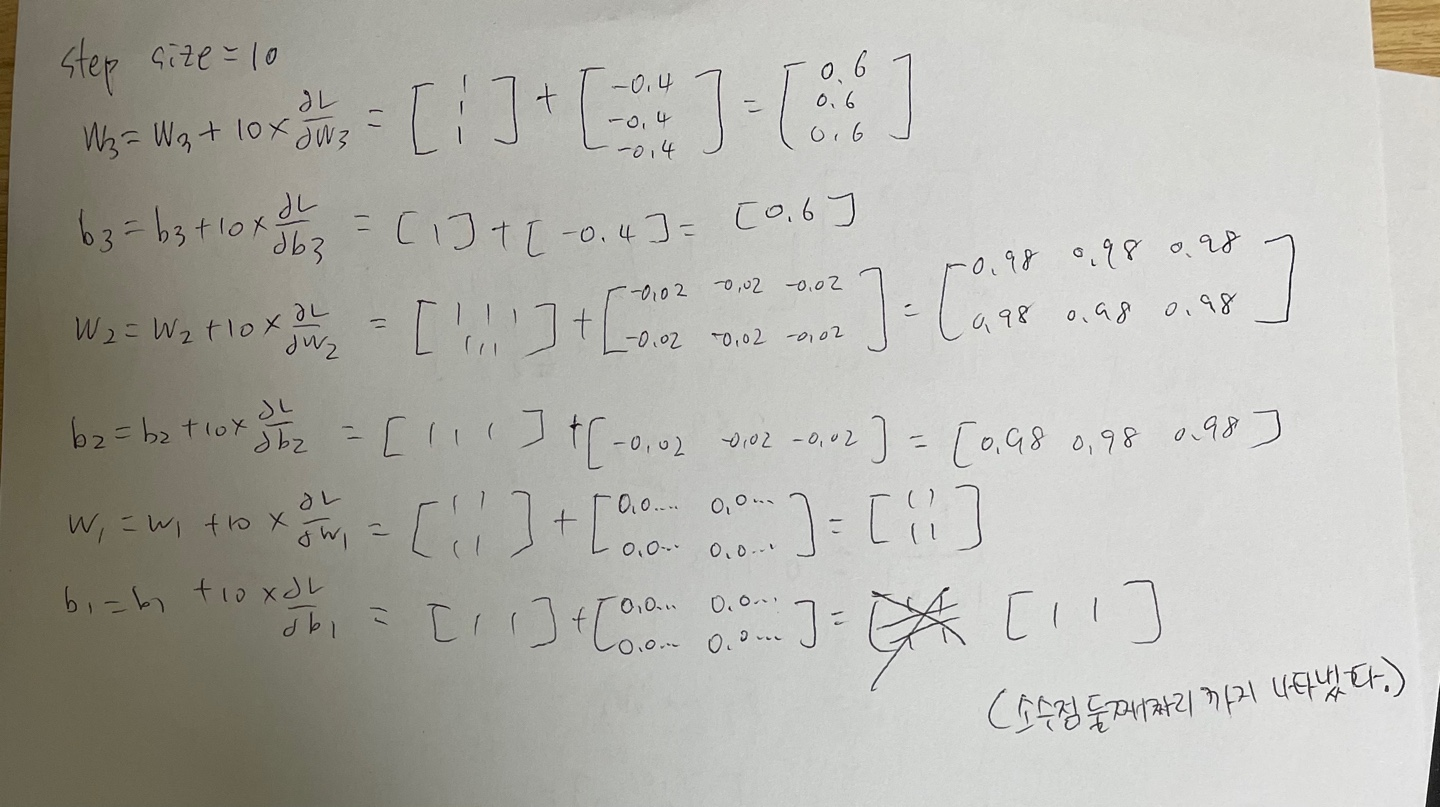

#### (d) 위에서 구현한 **순전파, 역전파 과정을 코딩**을 통해 검증하려 한다.

#### **W와 b를 1로 초기화**하고, **1회 업데이트된 W, b**를 손으로 계산한 값과 **비교**하시오.
- step size : 10

In [ ]:
def sigmoid(z):
  ################## Fill Your Code! ##################
  return 1 / (1+ np.exp(-z))
  #####################################################

def MSE(y, y_hat):
  ################## Fill Your Code! ##################
  # hint : np.mean / np.sum / np.log
  J = y - y_hat
  #####################################################
  return J

In [ ]:
################## Fill Your Code! ##################
# W1 b1 W2 b2 W3 b3 초기화
W1 = np.ones((2,2))
b1 = np.ones((1, 2))
W2 = np.ones((2,3))
b2 = np.ones((1,3))
W3 = np.ones((3,1))
b3 = np.ones((1,1))
#####################################################

In [ ]:
################## Fill Your Code! ##################
# 순전파(Forward)
z1 = X.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
a2 = sigmoid(z2)
z3 = a2.dot(W3) + b3
a3 = sigmoid(z3)
Y_hat = a3

L = MSE(Y, Y_hat)
print(L)
#####################################################

[[-0.97734212]
 [ 0.02142174]
 [ 0.02142174]
 [-0.97904707]]


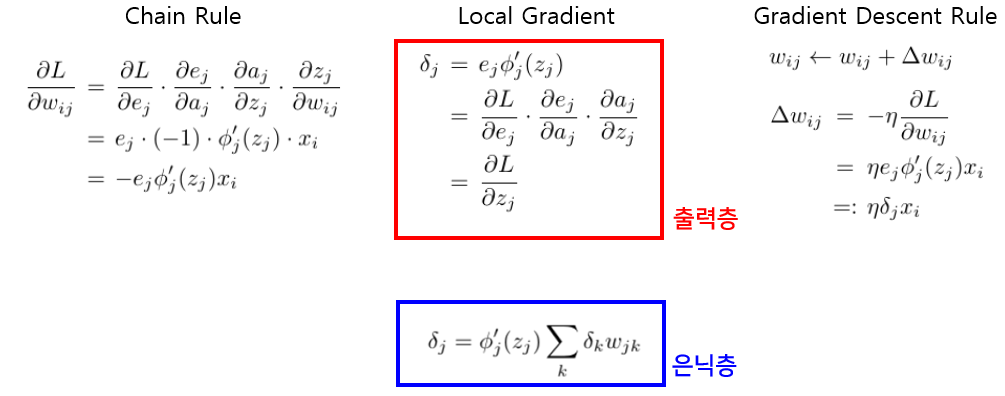

In [ ]:
################## Fill Your Code! ##################
# 역전파(Backward)
# 출력층
dLde = Y- Y_hat
deda3 = -1*np.ones((4, 1))
da3dz3 = a3*(1-a3)
dz3dW3 = a2
dz3db3 = np.ones((4, 1))
delta3 = dLde*deda3*da3dz3
delta3 = -delta3
dLdW3 = dz3dW3.T.dot(delta3)
dLdb3 = dz3db3.T.dot(delta3)

# 2번 은닉층
da2dz2 = a2*(1-a2)
delta2 = da2dz2* delta3.dot(W3.T)
dz2dW2 = a1
dz2db2 = np.ones((4, 1))
dLdW2 = dz2dW2.T.dot(delta2)
dLdb2 = dz2db2.T.dot(delta2)

# 1번 은닉층
da1dz1 = a1*(1-a1)
delta1 = da1dz1* delta2.dot(W2.T)
dz1dW1 = X
dz1db1 = np.ones((4,1))
dLdW1 = dz1dW1.T.dot(delta1)
dLdb1 = dz1db1.T.dot(delta1)

# Gradient Descent Rule
eta = 10
W3 = W3 + eta*dLdW3
b3 = b3 + eta*dLdb3
W2 = W2 + eta*dLdW2
b2 = b2 + eta*dLdb2
W1 = W1 + eta*dLdW1
b1 = b1 + eta*dLdb1
#####################################################
print("출력층")
print("W3")
print(W3)
print("b3")
print(b3)

print("\n2번 은닉층")
print("W2")
print(W2)
print("b2")
print(b2)

print("\n1번 은닉층")
print("W1")
print(W1)
print("b1")
print(b1)


출력층
W3
[[0.61860454]
 [0.61860454]
 [0.61860454]]
b3
[[0.59171288]]

2번 은닉층
W2
[[0.97957537 0.97957537 0.97957537]
 [0.97957537 0.97957537 0.97957537]]
b2
[[0.97495322 0.97495322 0.97495322]]

1번 은닉층
W1
[[0.99873968 0.99873968]
 [0.99873968 0.99873968]]
b1
[[0.98957823 0.98957823]]


#### (e) 위 코드들을 참조하여 **순전파, 역전파 과정을** 반복하고, XOR에 대한 classifier를 구현하시오.
- step size : 0.1
- num of iteration : 10000
- W, b 초기화 : rand

In [ ]:
np.random.seed(2023)
################## Fill Your Code! ##################
W1 = np.random.randn(2,2)
b1 = np.random.randn(1,2)
W2 = np.random.randn(2,3)
b2 = np.random.randn(1,3)
W3 = np.random.randn(3,1)
b3 = np.random.randn(1,1)
#####################################################

n_iterations = 10000
eta = 0.1
for iteration in range(n_iterations):
    ##################################################
    #    순전파, 손실 함수 계산, 역전파 수행하기     #
    ##################################################
    # 순전파(Forward)
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(W3) + b3
    a3 = sigmoid(z3)
    Y_hat = a3

    # MSE
    L = MSE(Y, Y_hat)

    # 역전파(Backward)
    # 출력층
    dLde = Y- Y_hat
    deda3 = -1*np.ones((4, 1))
    da3dz3 = a3*(1-a3)
    dz3dW3 = a2
    dz3db3 = np.ones((4, 1))
    delta3 = dLde*deda3*da3dz3
    delta3 = -delta3
    dLdW3 = dz3dW3.T.dot(delta3)
    dLdb3 = dz3db3.T.dot(delta3)

    # 2번 은닉층
    da2dz2 = a2*(1-a2)
    delta2 = da2dz2* delta3.dot(W3.T)
    dz2dW2 = a1
    dz2db2 = np.ones((4, 1))
    dLdW2 = dz2dW2.T.dot(delta2)
    dLdb2 = dz2db2.T.dot(delta2)

    # 1번 은닉층
    da1dz1 = a1*(1-a1)
    delta1 = da1dz1* delta2.dot(W2.T)
    dz1dW1 = X
    dz1db1 = np.ones((4,1))
    dLdW1 = dz1dW1.T.dot(delta1)
    dLdb1 = dz1db1.T.dot(delta1)

    # Gradient Descent Rule
    W3 = W3 + eta*dLdW3
    b3 = b3 + eta*dLdb3
    W2 = W2 + eta*dLdW2
    b2 = b2 + eta*dLdb2
    W1 = W1 + eta*dLdW1
    b1 = b1 + eta*dLdb1

    ##################################################
    #                  코드 작성 끝                  #
    ##################################################

print("After Learning")
print("Y_hat")
print(Y_hat)
print("loss")
print(L)

After Learning
Y_hat
[[0.06430328]
 [0.92710999]
 [0.94184193]
 [0.05514905]]
loss
[[-0.06430328]
 [ 0.07289001]
 [ 0.05815807]
 [-0.05514905]]


In [ ]:
def binary_classifier(p_hat):
  y_hat = (p_hat >=0.5).astype(int)
  return y_hat

binary_classifier(Y_hat)

array([[0],
       [1],
       [1],
       [0]])

## 2.다층 신경망 클래스 구현 #1(오차역전파)

##### (a) multi class 문제를 해결하기 위해, 아래 기능을 가지는 다층 신경망 클래스를 구현하려 한다.

- \_\_init__({num of in_features}, {learning rate}, {num of iteration})

- addLayer({num of node}, {activation function})

- forward()

- backward()

- fit({input data}, {output data})

- predict({input data}, {prob})


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
from scipy.special import softmax
from sklearn.metrics import log_loss as cross_entropy_loss

In [ ]:
class MultiLayerNeuralNetwork_softmax:
    #### init 함수는 이미 완성되어 있습니다.
    def __init__(self, in_features=100, eta=0.01, num_iter=10000):
        self.in_features = in_features
        self.eta = eta
        self.num_iter = num_iter
        self.out_features = None
        self.num_data = None

        self.num_of_layer = 0

        # W, b : dict 형태로 각 층의 W, b를 저장합니다.
        self.W = {}
        self.b = {}
        self.act_fun = {}  # layer's activation function

        # Forward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.loss = None
        self.e = None
        self.Y = None
        self.Y_hat = None
        self.X = None
        self.a = {}
        self.z = {}
        self.input = {} # 역전파에서 이전 입력을 읽어올 때 사용합니다.
        self.output = {} # 순전파에서 이전 출력을 읽어올 때 사용합니다.


        # Backward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.delta = {}
        self.grad_W = {}
        self.grad_b = {}
        self.dLdW = {}
        self.dLdb = {}

        # 활성화 함수들과 그에 대한 미분을 정의하고 있습니다.
        # activation_functions
        self.activation_functions = {}
        self.activation_functions['sigmoid'] = lambda z: 1 / (1 + np.exp(-z))
        self.activation_functions['tanh'] = lambda z: np.tanh(z)
        self.activation_functions['softmax'] = lambda z : softmax(z, axis=1)

        # activation_functions_prime
        self.activation_functions_prime = {}
        self.activation_functions_prime['sigmoid'] = lambda a: a * (1 - a)
        self.activation_functions_prime['tanh'] = lambda a: (1 - np.tanh(a)) * (1 + np.tanh(a))
        self.activation_functions_prime['softmax'] = lambda y_hat, y: (y_hat - y) / y.shape[0]

    def addLayer(self, num_of_node=10, activation='sigmoid'):
        # 레이어 개수를 증가 시킵니다.
        self.num_of_layer += 1

        if self.num_of_layer == 1:
            # 처음 레이어를 추가합니다.
            num_of_input = self.in_features
        else:
            # 이전 레이어의 노드 개수를 가져옵니다.
            num_of_input = self.b[self.num_of_layer - 1].shape[1]
        #############################################################################
        ##                추가된 은닉층에 대한 W, b 차원 구하기                    ##
        #############################################################################
        # 추가된 레이어가 가지는 W, b, 활성화 함수를 저장합니다.

        self.W[self.num_of_layer] = np.random.randn(num_of_input, num_of_node)
        self.b[self.num_of_layer] = np.random.randn(1, num_of_node)
        self.act_fun[self.num_of_layer] = activation



    def forward(self):
        # 추가된 레이어를 모두 거치며 순전파가 시작됩니다.
        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = self.X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i - 1]
            #############################################################################
            ##                               순전파 구현                               ##
            #############################################################################

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # Forward
            z = X.dot(W) + b
            a = act_fun(z)

            # save for backward : backpropagation에 사용될 정보를 저장합니다.
            self.z[i] = z
            self.a[i] = a
            self.output[i] = a
            self.input[i] = X
            #############################################################################
            ##                              코드 구현 끝                               ##
            #############################################################################
        # 최종 결과 Y_hat과 loss를 저장합니다.
        Y_hat = a
        loss = cross_entropy_loss(self.Y, Y_hat)
        # save for backward
        self.Y_hat = a
        self.loss = loss


    def backward(self):
        # 역전파는 출력단에서부터 계산이 시작됩니다.
        eta = self.eta
        for i in reversed(range(1, self.num_of_layer + 1)):
            # Load : 역전파에 사용할 값들을 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            a = self.a[i]
            z = self.z[i]
            act_fun = self.act_fun[i]
            N = self.num_data
            #############################################################################
            ##                               역전파 구현                               ##
            #############################################################################

            # 역전파에서는 출력층과 은닉층이 다르게 계산됩니다.
            # 출력층
            if i == self.num_of_layer:
                delta = (self.Y_hat- self.Y)/ N # local gradient
                delta = -1 * delta
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # 은닉층
            else:
                dadz = self.activation_functions_prime[act_fun](a)
                delta = dadz * self.delta[i+1].dot(self.W[i+1].T)  # local gradient
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # Save : 다음 역전파 및 Gradient descent에 사용할 값들을 저장합니다.
            self.delta[i] = delta
            self.dLdW[i] = dLdW
            self.dLdb[i] = dLdb

        # Gradient Descent
        for i in range(1, self.num_of_layer + 1):
            # load : 편미분 값을 읽어옵니다.
            dLdW = self.dLdW[i]
            dLdb = self.dLdb[i]
            # Save : 업데이트 후 값을 저장합니다.
            self.W[i] = self.W[i] + eta*dLdW
            self.b[i] = self.b[i] + eta*dLdb



    def fit(self, X, Y):
        #############################################################################
        ##                                학습 구현                                ##
        #############################################################################

        # 학습 시키는 과정은 순전파와 역전파가 iterative하게 동작합니다.
        self.X = X
        self.Y = Y
        self.num_data = X.shape[0]
        for i in range(self.num_iter):
            self.forward()
            self.backward()



    def predict(self, X, prob = False):
        #############################################################################
        ##                     classification predict 구현                         ##
        #############################################################################

        # Predict는 forward와 다르게, 계산된 정보를 저장하지 않고, 최종 결과를 출력합니다.
        # 이 때, 결과는 예측한 class가 됩니다.

        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i-1]

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # forward
            z = X.dot(W) + b
            a = act_fun(z)


        # predict는 확률값 또는 class를 출력합니다.
        Y_hat = a
        if prob:
            return np.round(Y_hat, 2)
        else :
            return Y_hat.argmax(axis=1)

##### (b) 위 (a)에서 구현한 MultiLayerNeuralNetwork_softmax를 사용하여, xor을 구현합니다.

##### xor에 대한 분류가 잘 될 수 있도록 신경망을 구성하시오.

In [ ]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
Y = get_one_hot(Y.reshape(-1), 2)

In [ ]:
#############################################################################
##    Class 안에서 정의한 다양한 기능을 사용하여 xor 분류기를 설계하자     ##
#############################################################################
MLNN = MultiLayerNeuralNetwork_softmax(in_features=2, eta=0.01, num_iter=10000)
MLNN.addLayer(100, 'sigmoid')
MLNN.addLayer(100, 'sigmoid')
MLNN.addLayer(2, 'softmax')
#############################################################################
##                              코드 구현 끝                               ##
#############################################################################
MLNN.fit(X, Y)
print(MLNN.loss)

0.005743742959291415


In [ ]:
MLNN.predict(X, prob = False)

array([0, 1, 1, 0])

In [ ]:
MLNN.predict(X, prob = True)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.99, 0.01]])

##### (c) 위 (a)에서 구현한 MultiLayerNeuralNetwork_softmax를 수정하여, **bipolar xor**을 구현합니다.

##### 입력 X_b에 대한 Y_b가 잘 나올 수 있도록 신경망을 수정하시오.

- softmax 대신, mean square error로 바뀌었습니다.
- loss 함수가 바뀌었기 때문에, 출력층의 local gradient도 바뀌어야 합니다.
- 활성화 함수의 모양을 잘 생각해 봅시다.

In [ ]:
class MultiLayerNeuralNetwork_MSE:
    #### init 함수는 이미 완성되어 있습니다.
    def __init__(self, in_features=100, eta=0.01, num_iter=10000):
        self.in_features = in_features
        self.eta = eta
        self.num_iter = num_iter
        self.out_features = None
        self.num_data = None

        self.num_of_layer = 0

        # W, b : dict 형태로 각 층의 W, b를 저장합니다.
        self.W = {}
        self.b = {}
        self.act_fun = {}  # layer's activation function

        # Forward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.loss = None
        self.e = None
        self.Y = None
        self.Y_hat = None
        self.X = None
        self.a = {}
        self.z = {}
        self.input = {} # 역전파에서 이전 입력을 읽어올 때 사용합니다.
        self.output = {} # 순전파에서 이전 출력을 읽어올 때 사용합니다.

        # Backward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.delta = {}
        self.grad_W = {}
        self.grad_b = {}
        self.dLdW = {}
        self.dLdb = {}

        # 활성화 함수들과 그에 대한 미분을 정의하고 있습니다.
        # activation_functions
        self.activation_functions = {}
        self.activation_functions['sigmoid'] = lambda z: 1 / (1 + np.exp(-z))
        self.activation_functions['tanh'] = lambda z: np.tanh(z)

        # activation_functions_prime
        self.activation_functions_prime = {}
        self.activation_functions_prime['sigmoid'] = lambda a: a * (1 - a)
        self.activation_functions_prime['tanh'] = lambda a: (1 - np.tanh(a)) * (1 + np.tanh(a))

    def addLayer(self, num_of_node=10, activation='tanh'):
        # 레이어 개수를 증가 시킵니다.
        self.num_of_layer += 1

        if self.num_of_layer == 1:
            # 처음 레이어를 추가합니다.
            num_of_input = self.in_features
        else:
            # 이전 레이어의 노드 개수를 가져옵니다.
            num_of_input = self.b[self.num_of_layer - 1].shape[1]
        #############################################################################
        ##                추가된 은닉층에 대한 W, b 차원 구하기                    ##
        #############################################################################

        # 추가된 레이어가 가지는 W, b, 활성화 함수를 저장합니다.
        self.W[self.num_of_layer] = np.random.randn(num_of_input, num_of_node)
        self.b[self.num_of_layer] = np.random.randn(1, num_of_node)
        self.act_fun[self.num_of_layer] = activation
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def forward(self):
        # 추가된 레이어를 모두 거치며 순전파가 시작됩니다.
        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = self.X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i - 1]
            #############################################################################
            ##                               순전파 구현                               ##
            #############################################################################

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # Forward
            z = X.dot(W) + b
            a = act_fun(z)

            # save for backward : backpropagation에 사용될 정보를 저장합니다.
            self.z[i] = z
            self.a[i] = a
            self.output[i] = a
            self.input[i] = X
            #############################################################################
            ##                              코드 구현 끝                               ##
            #############################################################################
        # 최종 결과 Y_hat과 loss를 저장합니다.
        # MSE를 사용하여 loss를 계산합니다.
        Y_hat = a
        loss = np.mean((self.Y - Y_hat)**2)

        # save for backward
        self.Y_hat = a
        self.loss = loss


    def backward(self):
        # 역전파는 출력단에서부터 계산이 시작됩니다.
        eta = self.eta
        for i in reversed(range(1, self.num_of_layer + 1)):
            # Load : 역전파에 사용할 값들을 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            a = self.a[i]
            z = self.z[i]
            act_fun = self.act_fun[i]
            N = self.num_data
            #############################################################################
            ##                               역전파 구현                               ##
            #############################################################################

            # 역전파에서는 출력층과 은닉층이 다르게 계산됩니다.
            # softmax+cross entropy 때와는 다른 모양을 가져야 합니다.
            # 출력층
            if i == self.num_of_layer:
                dLde = self.Y-self.Y_hat
                deda = -1 * np.ones((N,1))
                dadz = self.activation_functions_prime[act_fun](a)
                delta = -1 * dLde*deda*dadz          # local gradient
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # 은닉층
            else:
                dadz = self.activation_functions_prime[act_fun](a)
                delta = dadz * self.delta[i+1].dot(self.W[i+1].T)  # local gradient
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # Save : 다음 역전파 및 Gradient descent에 사용할 값들을 저장합니다.
            self.delta[i] = delta
            self.dLdW[i] = dLdW
            self.dLdb[i] = dLdb

        # Gradient Descent
        for i in range(1, self.num_of_layer + 1):
            # load : 편미분 값을 읽어옵니다.
            dLdW = self.dLdW[i]
            dLdb = self.dLdb[i]
            # Save : 업데이트 후 값을 저장합니다.
            self.W[i] = self.W[i] + eta*dLdW
            self.b[i] = self.b[i] + eta*dLdb
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def fit(self, X, Y):
        #############################################################################
        ##                                학습 구현                                ##
        #############################################################################

        # 학습 시키는 과정은 순전파와 역전파가 iterative하게 동작합니다.
        self.X = X
        self.Y = Y
        self.num_data = X.shape[0]
        for i in range(self.num_iter):
            self.forward()
            self.backward()
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def predict(self, X):
        #############################################################################
        ##                     classification predict 구현                         ##
        #############################################################################

        # Forward와 다르게, 계산된 정보를 저장하지 않고, 최종 결과를 출력합니다.
        # 이 때, 결과는 class가 됩니다.

        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i-1]

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # forward
            z = X.dot(W) + b
            a = act_fun(z)

        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        Y_hat = a
        return Y_hat

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
Y = get_one_hot(Y.reshape(-1), 2)

In [ ]:
def binary_to_bipolar(bin):
    # https://stackoverflow.com/questions/39650312/convert-a-numpy-array-into-an-array-of-signs-with-0-as-positive
    bip = 2*(bin > 0) - 1
    return bip

X_b = binary_to_bipolar(X)
Y_b = binary_to_bipolar(Y)

In [ ]:
print(X_b)
print("")
print(Y_b)

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]

[[ 1 -1]
 [-1  1]
 [-1  1]
 [ 1 -1]]


In [ ]:
#############################################################################
##    Class 안에서 정의한 다양한 기능을 사용하여 xor 분류기를 설계하자     ##
#############################################################################
MLNN = MultiLayerNeuralNetwork_MSE(in_features=2, eta=0.01, num_iter=10000)

MLNN.addLayer(10, 'sigmoid')
MLNN.addLayer(2, 'tanh')


#############################################################################
##                              코드 구현 끝                               ##
#############################################################################
MLNN.fit(X_b, Y_b)
print(MLNN.loss)

0.00018629744772954572


In [ ]:
MLNN.predict(X_b)

array([[ 0.98605757, -0.98974741],
       [-0.98206643,  0.98691116],
       [-0.98510815,  0.98909248],
       [ 0.9846056 , -0.98904641]])

##### (d) 위 (a)에서 구현한 MultiLayerNeuralNetwork_softmax를 사용하여, digit 분류기를 구현합니다.

##### 분류가 잘 될 수 있도록 신경망을 구성하시오.

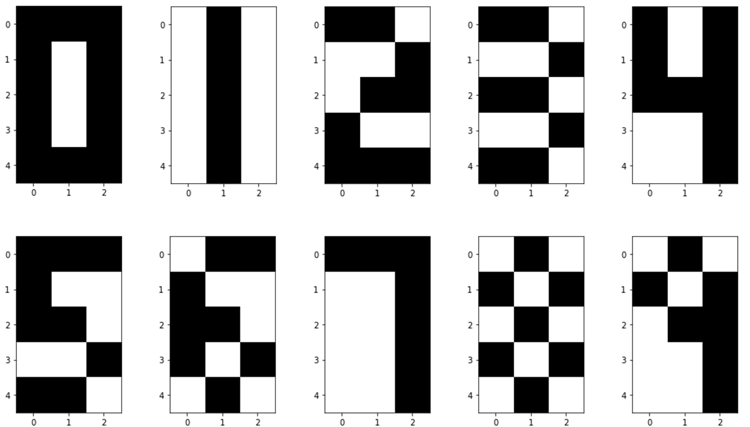

In [ ]:
D0 = np.array([[1, 1, 1],
               [1, 0, 1],
               [1, 0, 1],
               [1, 0, 1],
               [1, 1, 1]])
D1 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]])
D2 = np.array([[1, 1, 0],
               [0, 0, 1],
               [0, 1, 1],
               [1, 0, 0],
               [1, 1, 1]])
D3 = np.array([[1, 1, 0],
               [0, 0, 1],
               [1, 1, 0],
               [0, 0, 1],
               [1, 1, 0]])
D4 = np.array([[1, 0, 1],
               [1, 0, 1],
               [1, 1, 1],
               [0, 0, 1],
               [0, 0, 1]])
D5 = np.array([[1, 1, 1],
               [1, 0, 0],
               [1, 1, 0],
               [0, 0, 1],
               [1, 1, 0]])
D6 = np.array([[0, 1, 1],
               [1, 0, 0],
               [1, 1, 0],
               [1, 0, 1],
               [0, 1, 0]])
D7 = np.array([[1, 1, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1]])
D8 = np.array([[0, 1, 0],
               [1, 0, 1],
               [0, 1, 0],
               [1, 0, 1],
               [0, 1, 0]])
D9 = np.array([[0, 1, 0],
               [1, 0, 1],
               [0, 1, 1],
               [0, 0, 1],
               [0, 0, 1]])

In [ ]:
class MultiLayerNeuralNetwork_softmax:
    #### init 함수는 이미 완성되어 있습니다.
    def __init__(self, in_features=100, eta=0.01, num_iter=10000):
        self.in_features = in_features
        self.eta = eta
        self.num_iter = num_iter
        self.out_features = None
        self.num_data = None

        self.num_of_layer = 0

        # W, b : dict 형태로 각 층의 W, b를 저장합니다.
        self.W = {}
        self.b = {}
        self.act_fun = {}  # layer's activation function

        # Forward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.loss = None
        self.e = None
        self.Y = None
        self.Y_hat = None
        self.X = None
        self.a = {}
        self.z = {}
        self.input = {} # 역전파에서 이전 입력을 읽어올 때 사용합니다.
        self.output = {} # 순전파에서 이전 출력을 읽어올 때 사용합니다.


        # Backward
        # 역전파 및 gradient descent에 사용할 정보를 dict 형태로 저장합니다.
        self.delta = {}
        self.grad_W = {}
        self.grad_b = {}
        self.dLdW = {}
        self.dLdb = {}

        # 활성화 함수들과 그에 대한 미분을 정의하고 있습니다.
        # activation_functions
        self.activation_functions = {}
        self.activation_functions['sigmoid'] = lambda z: 1 / (1 + np.exp(-z))
        self.activation_functions['tanh'] = lambda z: np.tanh(z)
        self.activation_functions['softmax'] = lambda z : softmax(z, axis=1)

        # activation_functions_prime
        self.activation_functions_prime = {}
        self.activation_functions_prime['sigmoid'] = lambda a: a * (1 - a)
        self.activation_functions_prime['tanh'] = lambda a: (1 - np.tanh(a)) * (1 + np.tanh(a))
        self.activation_functions_prime['softmax'] = lambda y_hat, y: (y_hat - y) / y.shape[0]

    def addLayer(self, num_of_node=10, activation='sigmoid'):
        # 레이어 개수를 증가 시킵니다.
        self.num_of_layer += 1

        if self.num_of_layer == 1:
            # 처음 레이어를 추가합니다.
            num_of_input = self.in_features
        else:
            # 이전 레이어의 노드 개수를 가져옵니다.
            num_of_input = self.b[self.num_of_layer - 1].shape[1]
        #############################################################################
        ##                추가된 은닉층에 대한 W, b 차원 구하기                    ##
        #############################################################################
        # 추가된 레이어가 가지는 W, b, 활성화 함수를 저장합니다.

        self.W[self.num_of_layer] = np.random.randn(num_of_input, num_of_node)
        self.b[self.num_of_layer] = np.random.randn(1, num_of_node)
        self.act_fun[self.num_of_layer] = activation
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def forward(self):
        # 추가된 레이어를 모두 거치며 순전파가 시작됩니다.
        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = self.X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i - 1]
            #############################################################################
            ##                               순전파 구현                               ##
            #############################################################################

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # Forward
            z = X.dot(W) + b
            a = act_fun(z)

            # save for backward : backpropagation에 사용될 정보를 저장합니다.
            self.z[i] = z
            self.a[i] = a
            self.output[i] = a
            self.input[i] = X
            #############################################################################
            ##                              코드 구현 끝                               ##
            #############################################################################
        # 최종 결과 Y_hat과 loss를 저장합니다.
        Y_hat = a
        loss = cross_entropy_loss(self.Y, Y_hat)
        # save for backward
        self.Y_hat = a
        self.loss = loss


    def backward(self):
        # 역전파는 출력단에서부터 계산이 시작됩니다.
        eta = self.eta
        for i in reversed(range(1, self.num_of_layer + 1)):
            # Load : 역전파에 사용할 값들을 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            a = self.a[i]
            z = self.z[i]
            act_fun = self.act_fun[i]
            N = self.num_data
            #############################################################################
            ##                               역전파 구현                               ##
            #############################################################################

            # 역전파에서는 출력층과 은닉층이 다르게 계산됩니다.
            # 출력층
            if i == self.num_of_layer:
                delta = (self.Y_hat- self.Y)/ N # local gradient
                delta = -1 * delta
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # 은닉층
            else:
                dadz = self.activation_functions_prime[act_fun](a)
                delta = dadz * self.delta[i+1].dot(self.W[i+1].T)  # local gradient
                dzdW = self.input[i]
                dzdb = np.ones((N, 1))
                dLdW = dzdW.T.dot(delta)
                dLdb = dzdb.T.dot(delta)

            # Save : 다음 역전파 및 Gradient descent에 사용할 값들을 저장합니다.
            self.delta[i] = delta
            self.dLdW[i] = dLdW
            self.dLdb[i] = dLdb

        # Gradient Descent
        for i in range(1, self.num_of_layer + 1):
            # load : 편미분 값을 읽어옵니다.
            dLdW = self.dLdW[i]
            dLdb = self.dLdb[i]
            # Save : 업데이트 후 값을 저장합니다.
            self.W[i] = self.W[i] + eta*dLdW
            self.b[i] = self.b[i] + eta*dLdb
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def fit(self, X, Y):
        #############################################################################
        ##                                학습 구현                                ##
        #############################################################################

        # 학습 시키는 과정은 순전파와 역전파가 iterative하게 동작합니다.
        self.X = X
        self.Y = Y
        self.num_data = X.shape[0]
        for i in range(self.num_iter):
            self.forward()
            self.backward()
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def predict(self, X, prob = False):
        #############################################################################
        ##                     classification predict 구현                         ##
        #############################################################################

        # Predict는 forward와 다르게, 계산된 정보를 저장하지 않고, 최종 결과를 출력합니다.
        # 이 때, 결과는 예측한 class가 됩니다.

        for i in range(1, self.num_of_layer + 1):
            if i == 1:
                # 첫 레이어에서는 입력 데이터로 X가 사용됩니다.
                X = X
            else:
                # 첫 레이어가 아닌 경우, 이전 레이어의 출력이 입력데이터가 됩니다.
                X = self.output[i-1]

            # load parameter : 현재 레이어의 W, b와 활성화함수를 읽어옵니다.
            W = self.W[i]
            b = self.b[i]
            act_fun = self.activation_functions[self.act_fun[i]]

            # forward
            z = X.dot(W) + b
            a = act_fun(z)

        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        # predict는 확률값 또는 class를 출력합니다.
        Y_hat = a
        if prob:
            return np.round(Y_hat, 2)
        else :
            return Y_hat.argmax(axis=1)

In [ ]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])
# 각 x에 대한 Class
X = np.array([D0, D1, D2, D3, D4, D5, D6, D7, D8, D9])
Y = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])

# Flatten 및 one hot encoding
X = X.reshape(X.shape[0], -1).copy()
Y = get_one_hot(Y.reshape(-1), Y.shape[0])

In [ ]:
#############################################################################
##      Class 안에서 정의한 다양한 기능을 사용하여 분류기를 설계하자       ##
#############################################################################
MLNN = MultiLayerNeuralNetwork_softmax(in_features=15, eta=0.01, num_iter=10000)

MLNN.addLayer(100, 'sigmoid')
MLNN.addLayer(100, 'sigmoid')
MLNN.addLayer(10, 'softmax')



#############################################################################
##                              코드 구현 끝                               ##
#############################################################################
MLNN.fit(X, Y)
print(MLNN.loss)

0.006094069911130735


In [ ]:
MLNN.predict(X, prob = False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
MLNN.predict(X, prob = True)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]])

## 3.다층 신경망 클래스 구현 #2 (계산그래프)

#####(a) 문제 2번에서 구현한 [다층 신경망 클래스 구현#1]의 forward/backward 과정을 계산그래프로 구현하려 한다.
- \_\_init__({num of in_features}, {learning rate}, {num of iteration})

- addLayer({num of node}, {activation function})

- forward({input data})

- gradient({input data}, {output data})

- fit({input data}, {output data})

In [ ]:
# 계산그래프 기본 함수 및 클래스
import numpy as np
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x)) # Definition sigmoid
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Softmax:
    def __init__(self):
        self.loss = None      # 손실함수
        self.y_hat = None     # softmax의 출력
        self.y = None         # 정답 레이블(원-핫 인코딩 형태)

    def forward(self, x):
        self.y_hat = softmax(x)
        return self.y_hat

    def compute_loss(self, y):
        self.y = y
        self.loss = cross_entropy_error(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        if self.y.size == self.y_hat.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y_hat - self.y) / batch_size
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.y] -= 1
            dx = dx / batch_size

        return dx

In [ ]:
class MultiLayerNeuralNetwork_softmax:
    def __init__(self, in_features=100, eta=0.01, num_iter=10000):
        self.in_features = in_features
        self.eta = eta
        self.num_iter = num_iter

        self.num_of_layer = 0

        # dict의 형태로 각 층의 W, b를 저장합니다.
        self.params = {}

        # dict의 형태로 각 층에 layer를 저장합니다.
        self.layers = {}

        # 활성화 함수들을 정의하고 있습니다.
        # activation_functions
        self.activation_functions = {}
        self.activation_functions['sigmoid'] = Sigmoid
        self.activation_functions['relu'] = Relu
        self.activation_functions['softmax'] = Softmax


    def addLayer(self, num_of_node=10, activation='sigmoid'):
        # 레이어 개수를 증가 시킵니다.
        self.num_of_layer += 1

        if self.num_of_layer == 1:
            # 처음 레이어를 추가합니다.
            num_of_input = self.in_features
        else:
            # 이전 레이어의 노드 개수를 가져옵니다.
            num_of_input = self.params['b' + str(self.num_of_layer - 1)].shape[1]

        # 추가된 레이어가 가지는 W, b를 저장합니다.
        #############################################################################
        ##             W, b를 랜덤하게 생성하고, param에 저장합니다.               ##
        #############################################################################
        W = np.random.randn(num_of_input, num_of_node)
        b = np.random.randn(1, num_of_node)
        self.params['W' + str(self.num_of_layer)] = W
        self.params['b' + str(self.num_of_layer)] = b
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################

        # 레이어와 활성화 함수를 추가합니다.
        #############################################################################
        ##         새로운 레이어를 생성하고, 파라미터 W,b를 전달합니다.            ##
        ##         이어서, 활성화 함수 또한 새로운 레이어로 추가합니다.            ##
        #############################################################################
        self.layers['Affine' + str(self.num_of_layer)] = Affine(W, b)
        self.layers[activation + str(self.num_of_layer)] = self.activation_functions[activation]()
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        self.lastLayer = self.layers[activation + str(self.num_of_layer)]


    def forward(self, x):
        # 모든 layer를 순방향으로 계산합니다.
        #############################################################################
        ##                 Forward를 레이어 순서대로 실행합니다.                   ##
        #############################################################################
        for layer in self.layers.values():
            x = layer.forward(x)
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        y_hat = x
        return y_hat


    # x:입력데이터, y:정답레이블
    def compute_loss(self, x, y):
        self.forward(x)
        self.loss = self.lastLayer.compute_loss(y)
        return self.loss


    def gradient(self, x, y):
        # forward & loss
        self.compute_loss(x, y)

        # backward
        layers = list(self.layers.values())
        layers.reverse()
        dout = 1
        #############################################################################
        ##                  Backward 레이어 순서대로 실행합니다.                   ##
        #############################################################################
        for layer in layers:
          dout = layer.backward(dout)
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        # save grads
        grads = {}
        #############################################################################
        ##                          gradient를 저장합니다.                         ##
        #############################################################################
        for idx in range(1, self.num_of_layer+1):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################
        return grads


    def fit(self, x, y):
      for epoch in range(1, self.num_iter+1):
        grads = self.gradient(X, Y)
        #############################################################################
        ##                     Gradient descent를 수행합니다.                      ##
        #############################################################################
        for idx in range(1, self.num_of_layer+1):
            self.params['W' + str(idx)] -= self.eta*grads['W' + str(idx)]
            self.params['b' + str(idx)] -= self.eta*grads['b' + str(idx)]
        #############################################################################
        ##                              코드 구현 끝                               ##
        #############################################################################


    def predict(self, x, prob):
        # 모든 layer를 순방향으로 계산합니다.
        for layer in self.layers.values():
            x = layer.forward(x)
        # predict는 확률값 또는 class를 출력합니다.
        y_hat = x
        if prob:
            return np.round(y_hat, 2)
        else :
            return y_hat.argmax(axis=1)

##### (b) 위 (a)에서 구현한 MultiLayerNeuralNetwork_softmax를 사용하여, xor을 구현합니다.

##### xor에 대한 분류가 잘 될 수 있도록 신경망을 구성하시오.

In [ ]:
# https://stackoverflow.com/questions/65643248/one-hot-encoding-from-numpy
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
Y = get_one_hot(Y.reshape(-1), 2)

In [ ]:
#############################################################################
##    Class 안에서 정의한 다양한 기능을 사용하여 xor 분류기를 설계하자     ##
#############################################################################
MLNN = MultiLayerNeuralNetwork_softmax(in_features=2, eta=0.01, num_iter=10000)
MLNN.addLayer(num_of_node=100, activation='sigmoid')
MLNN.addLayer(num_of_node=100, activation='sigmoid')
MLNN.addLayer(num_of_node=2, activation='softmax')


#############################################################################
##                              코드 구현 끝                               ##
#############################################################################
MLNN.fit(X, Y)
print(MLNN.loss)

0.005202357090297315


In [ ]:
MLNN.predict(X, prob = False)

array([0, 1, 1, 0])

In [ ]:
MLNN.predict(X, prob = True)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.99, 0.01]])

## 4.다층 신경망 구현 #3 (sklean을 이용한 구현)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

cancer = load_breast_cancer()
x=cancer.data
y=cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all,stratify=y_train_all, test_size=0.2,random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=500)
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989

In [ ]:
model1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=500)
history1 = model1.fit(x_train_scaled, y_train)

In [ ]:
model2 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=500)
history2 =  model2.fit(x_train_scaled, y_train)

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', alpha=0.5, batch_size=32, learning_rate_init=0.1, max_iter=500)
history3 = model3.fit(x_train_scaled, y_train)

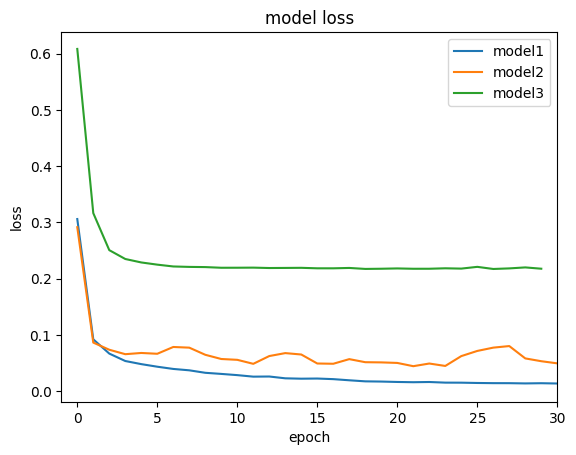

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.title( 'model loss' )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.plot(history1.loss_curve_)
plt.plot(history2.loss_curve_)
plt.plot(history3.loss_curve_)
plt.xlim(-1,30)
plt.legend([ 'model1' , 'model2', 'model3' ], loc= 'upper right' )
plt.show()